In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\hs414\OneDrive\Desktop\Major_2024\data\train.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
df.shape

(31962, 3)

In [7]:
df['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

## Here Label 0 equates to Normal Tweets and Label 1 equates to Hate Tweets

['Normal Tweets', 'Hate Tweets']


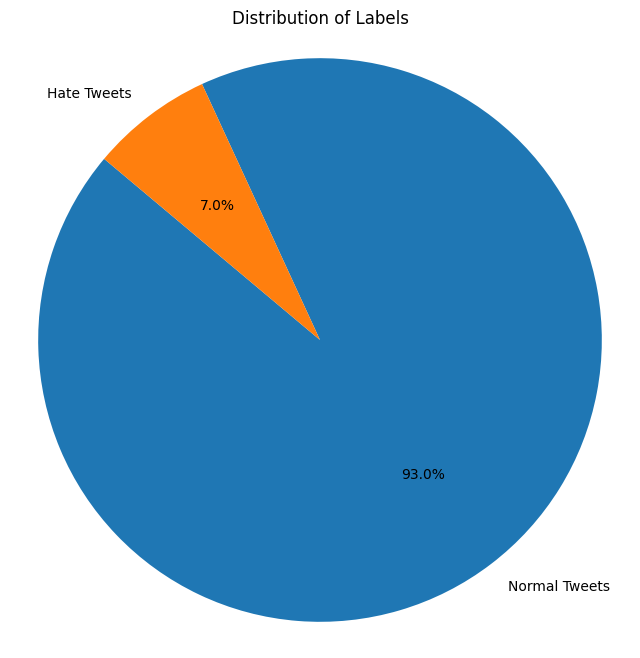

In [8]:
label_counts = df['label'].value_counts()


labels = ['Normal Tweets','Hate Tweets']
counts = label_counts.values

print(labels)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

## We can clearly see that the Normal tweets are more in number than the hate tweets we have we should undersample the dataset first to get  rid of these overrepresented classes

In [9]:
majority_class = df[df['label'] == 0]
minority_class = df[df['label'] == 1]

In [10]:
len(majority_class),len(minority_class)

(29720, 2242)

In [11]:
from sklearn.utils import resample
majority_downsample = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

In [12]:
downsampled_df = pd.concat([majority_downsample, minority_class])
downsampled_df.head()

,id,label,tweet
8824,8825,0,#body to body massage with a ending oil #mas...
31854,31855,0,@user @ my call back! #casting #castingcall ...
28079,28080,0,help creates the #environment of #togetherness...
29214,29215,0,summer with friendâ¨ð¥ #summer #friend #li...
20025,20026,0,follow me on snapchat at awesomecutenes7 #snap...


In [13]:
downsampled_df.reset_index(drop=True, inplace=True)
downsampled_df.drop('id', axis=1, inplace=True)
downsampled_df

,label,tweet
0,0,#body to body massage with a ending oil #mas...
1,0,@user @ my call back! #casting #castingcall ...
2,0,help creates the #environment of #togetherness...
3,0,summer with friendâ¨ð¥ #summer #friend #li...
4,0,follow me on snapchat at awesomecutenes7 #snap...
...,...,...
4479,1,lady banned from kentucky mall. @user #jcpenn...
4480,1,@user omfg i'm offended! i'm a mailbox and i'...
4481,1,@user @user you don't have the balls to hashta...
4482,1,"makes you ask yourself, who am i? then am i a..."


In [14]:
downsampled_df.shape

(4484, 2)

['Normal Tweets', 'Hate Tweets']


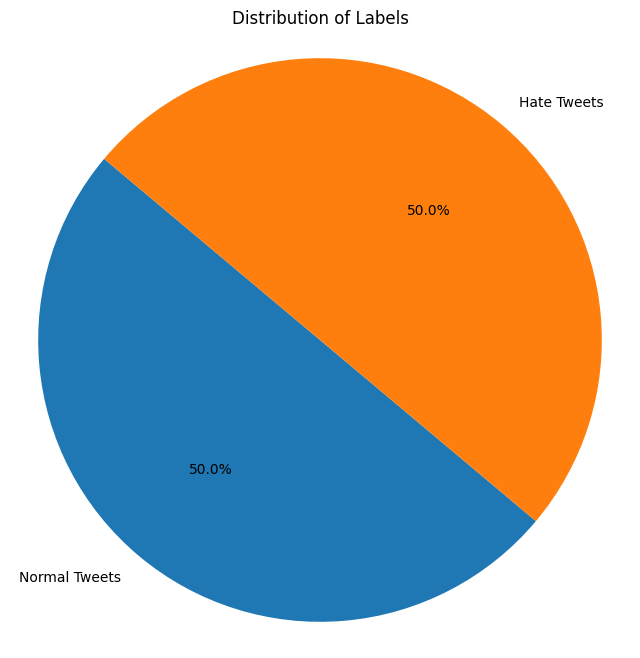

In [15]:
label_counts = downsampled_df['label'].value_counts()


labels = ['Normal Tweets','Hate Tweets']
counts = label_counts.values

print(labels)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

## We would now use NLP techniques to Clean the tweets

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hs414\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hs414\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hs414\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hs414\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
X = downsampled_df['tweet']
y = downsampled_df['label']
X

0       #body to body massage with a   ending oil #mas...
1        @user @ my call back!  #casting #castingcall ...
2       help creates the #environment of #togetherness...
3       summer with friendâ¨ð¥ #summer  #friend #li...
4       follow me on snapchat at awesomecutenes7 #snap...
                              ...                        
4479    lady banned from kentucky mall. @user  #jcpenn...
4480    @user omfg i'm offended! i'm a  mailbox and i'...
4481    @user @user you don't have the balls to hashta...
4482     makes you ask yourself, who am i? then am i a...
4483    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 4484, dtype: object

In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
tweets = X.copy()
corpus = []
for i in range(len(tweets)):
    review = re.sub('[^a-zA-Z]', ' ', tweets[i])
    review = review.lower()
    review = review.split()
    
    review = ' '.join(review)
    corpus.append(review)




In [19]:
tokenized_tweets = [word_tokenize(tweet.lower()) for tweet in corpus]
stop_words = set(stopwords.words('english'))
filtered_tweets = []
for tweet_tokens in tokenized_tweets:
    filtered_tokens = [word for word in tweet_tokens if word not in stop_words]
    filtered_tweets.append(filtered_tokens)


In [20]:
filtered_tweets

[['body',
  'body',
  'massage',
  'ending',
  'oil',
  'massage',
  'body',
  'happyending',
  'massage',
  'center',
  'abu',
  'dhabi'],
 ['user',
  'call',
  'back',
  'casting',
  'castingcall',
  'model',
  'cute',
  'toddler',
  'toddlerlife',
  'photooftheday',
  'nofilter',
  'family',
  'htt'],
 ['help',
  'creates',
  'environment',
  'togetherness',
  'amp',
  'mutualrespect',
  'prerequisites',
  'sustainable',
  'healthy',
  'society',
  'fridayfeeling'],
 ['summer',
  'friend',
  'summer',
  'friend',
  'life',
  'vlog',
  'weeknd',
  'crazy',
  'miss'],
 ['follow',
  'snapchat',
  'awesomecutenes',
  'snapchat',
  'selfie',
  'sad',
  'love',
  'bff',
  'yaaaaasss'],
 ['user',
  'robbie',
  'told',
  'user',
  'thesmb',
  'lead',
  'asked',
  'broadcast',
  'user',
  'blessed',
  'spats'],
 ['cupcakes', 'beachpay', 'payplanning', 'friends', 'enough', 'justwannabeme'],
 ['happy',
  'boy',
  'love',
  'guy',
  'littleman',
  'loveofmylife',
  'littlebuddy',
  'smile',
  '

In [21]:
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [22]:
stemmer = PorterStemmer()
stemmed_tweets = [' '.join([stemmer.stem(word) for word in tweet]) for tweet in filtered_tweets]

In [23]:
lemmatizer = WordNetLemmatizer()
lemmatized_tweets = [' '.join([lemmatizer.lemmatize(word) for word in tweet]) for tweet in filtered_tweets]

In [24]:
stemmed_tweets

['bodi bodi massag end oil massag bodi happyend massag center abu dhabi',
 'user call back cast castingcal model cute toddler toddlerlif photooftheday nofilt famili htt',
 'help creat environ togeth amp mutualrespect prerequisit sustain healthi societi fridayfeel',
 'summer friend summer friend life vlog weeknd crazi miss',
 'follow snapchat awesomecuten snapchat selfi sad love bff yaaaaasss',
 'user robbi told user thesmb lead ask broadcast user bless spat',
 'cupcak beachpay payplan friend enough justwannabem',
 'happi boy love guy littleman loveofmylif littlebuddi smile bestbuddi',
 'keshi news realli hard accept sosudden',
 'day porn movi skinni amateur sex',
 'greatest gift life friendship receiv friendship girl',
 'month ago thought could live size glad kept go fit cleanliv',
 'user arr look taylor slide sister x',
 'hobi face look like omg disgust experi',
 'bubbl energi user amp new face powerofu also listen user nervou amp',
 'justinb gorilla simul need adapt environ need tear

In [25]:
lemmatized_tweets

['body body massage ending oil massage body happyending massage center abu dhabi',
 'user call back casting castingcall model cute toddler toddlerlife photooftheday nofilter family htt',
 'help creates environment togetherness amp mutualrespect prerequisite sustainable healthy society fridayfeeling',
 'summer friend summer friend life vlog weeknd crazy miss',
 'follow snapchat awesomecutenes snapchat selfie sad love bff yaaaaasss',
 'user robbie told user thesmb lead asked broadcast user blessed spat',
 'cupcake beachpay payplanning friend enough justwannabeme',
 'happy boy love guy littleman loveofmylife littlebuddy smile bestbuddy',
 'keshi news really hard accept sosudden',
 'day porn movie skinny amateur sex',
 'greatest gift life friendship received friendship girl',
 'month ago thought could live size glad kept going fitness cleanliving',
 'user arr look taylor slide sister x',
 'hobi face look like omg disgusting experience',
 'bubbling energy user amp new face powerofus also li

## Since we can not work on this data we will convert these words to vectors using One Hot Encoding , Bag Of Words and Term Frequency Inverse  Document Frequency.

In [26]:
# One Hot Encoding on stemmed_tweets
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [27]:
one_hot_results = tokenizer.texts_to_sequences(stemmed_tweets)

In [28]:
one_hot_results

[[281, 427, 2807, 4477, 4478],
 [1, 182, 114, 5670, 271, 272, 2056, 659],
 [253, 13, 4482],
 [176, 453, 176, 453, 74, 2057, 4485, 396],
 [207, 892, 892, 6540, 208, 24, 1367],
 [1, 1150, 1, 4490, 2058, 782, 4491, 1, 1181],
 [4494, 453, 311],
 [543, 24, 220, 2812, 122],
 [2446, 202, 370, 720, 4502],
 [33, 247, 2813, 144],
 [2061, 511, 74, 893, 893, 135],
 [620, 721, 255, 288, 166, 1368, 896, 2814, 97, 1799],
 [1, 4504, 159, 2815, 2816, 991, 483],
 [335, 159, 30, 532],
 [1, 13, 40, 335, 289, 121, 1, 13],
 [4510, 603, 130, 1154, 130, 992, 2062],
 [326, 33, 1242, 145],
 [1370, 263, 170, 4512, 4513, 4514],
 [290, 2063, 2064, 4515, 4516],
 [253, 235, 104, 33, 2065, 1648],
 [271, 24, 62, 105, 62, 69, 514],
 [95, 1, 1, 4517],
 [453, 4519, 897, 4521, 189],
 [408, 546, 1, 30, 26, 4523, 1371, 2820],
 [2821, 97, 2821, 2066, 79, 4529],
 [185, 4530, 1, 1372, 2067, 253, 84],
 [2822, 105, 4533, 4534, 13, 4535, 2823, 8960, 4537, 132],
 [2068, 4542, 457, 2058],
 [180, 84, 1077, 2826, 1374, 4546],
 [724],

In [29]:
max_length = max(len(tweet) for tweet in tokenized_tweets)
max_length

33

In [30]:
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [31]:
vocab_size

11744

In [32]:
#Since the Length of the tweets are different, we will pad the sequences to make them of equal length
from keras.preprocessing.sequence import pad_sequences
one_hot_padded = pad_sequences(one_hot_results, maxlen=max_length, padding='pre') #padding='pre' means that the padding will be added at the beginning of the sequence
one_hot_padded

array([[    0,     0,     0, ...,  2807,  4477,  4478],
       [    0,     0,     0, ...,   272,  2056,   659],
       [    0,     0,     0, ...,   253,    13,  4482],
       ...,
       [    0,     0,     0, ...,  4464,   439, 11743],
       [    0,     0,     0, ...,   375,   257,   190],
       [    0,     0,     0, ...,   309,  8927,   260]])

In [33]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(stemmed_tweets)

In [34]:
bag_of_words

<4484x8409 sparse matrix of type '<class 'numpy.int64'>'
	with 35688 stored elements in Compressed Sparse Row format>

In [35]:
#TF_IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(stemmed_tweets)

## We will now try logistic regression for this classification and use all 3 of our techniques

In [36]:
#One Hot Encoding
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_padded, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter = 10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

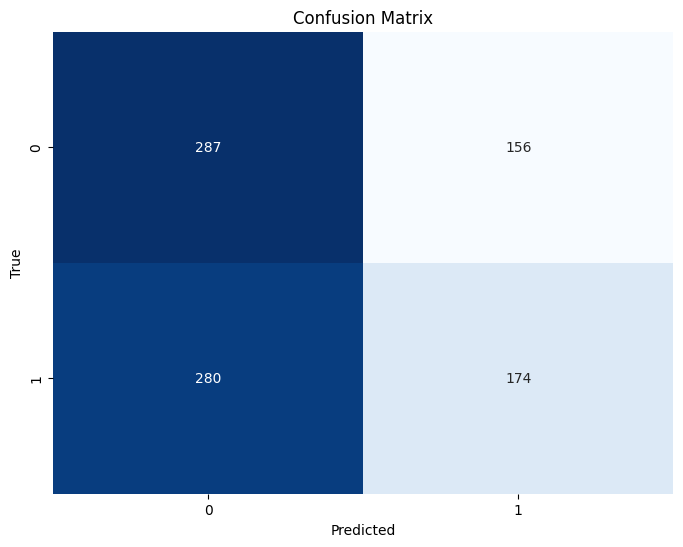

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = logistic_regression_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5139353400222966

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.5272727272727272
Recall: 0.3832599118942731
F1-score: 0.44387755102040816


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.65      0.57       443
           1       0.53      0.38      0.44       454

    accuracy                           0.51       897
   macro avg       0.52      0.52      0.51       897
weighted avg       0.52      0.51      0.51       897



In [42]:
#Bag Of Words
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size=0.2, random_state=42)

In [43]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

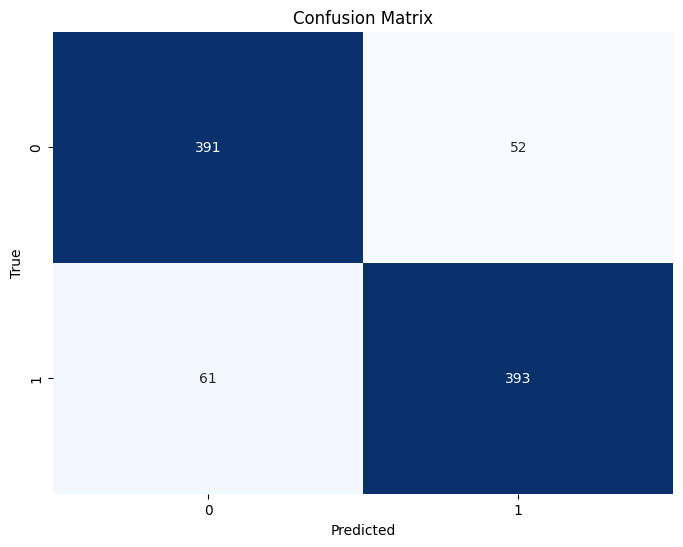

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = logistic_regression_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [45]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8740245261984393

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       443
           1       0.88      0.87      0.87       454

    accuracy                           0.87       897
   macro avg       0.87      0.87      0.87       897
weighted avg       0.87      0.87      0.87       897



In [47]:
#tfidf
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.2, random_state=42)

In [48]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

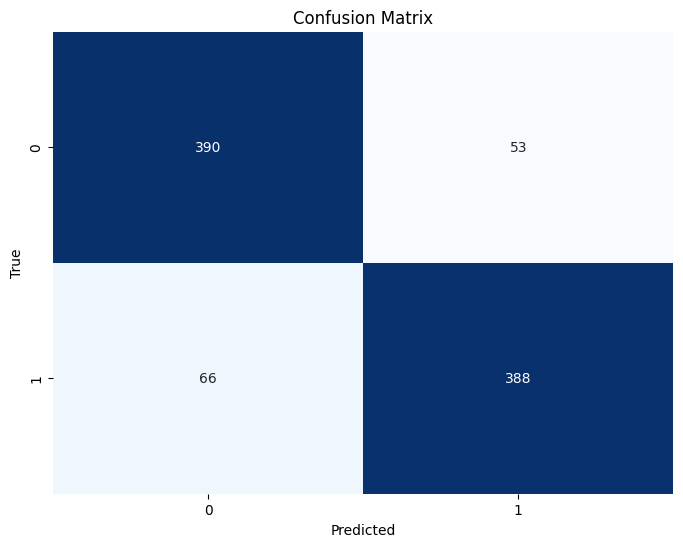

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = logistic_regression_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [50]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.867335562987737

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       443
           1       0.88      0.85      0.87       454

    accuracy                           0.87       897
   macro avg       0.87      0.87      0.87       897
weighted avg       0.87      0.87      0.87       897



## Here we can see that The One Hot Encoding gives the least accuracy of 0.5139353400222966 Followed by tfidf which gives 0.867335562987737 and at last Bag of words which gives  the highest accuracy of 0.8740245261984393
## Going forward we will only be using TFIDF and BOW  for text classification.

In [52]:
# Bag of Words on lemmatized tweets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(lemmatized_tweets)

In [53]:
#TF_IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(stemmed_tweets)

In [54]:
#Bag Of Words
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size=0.2, random_state=42)

In [55]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

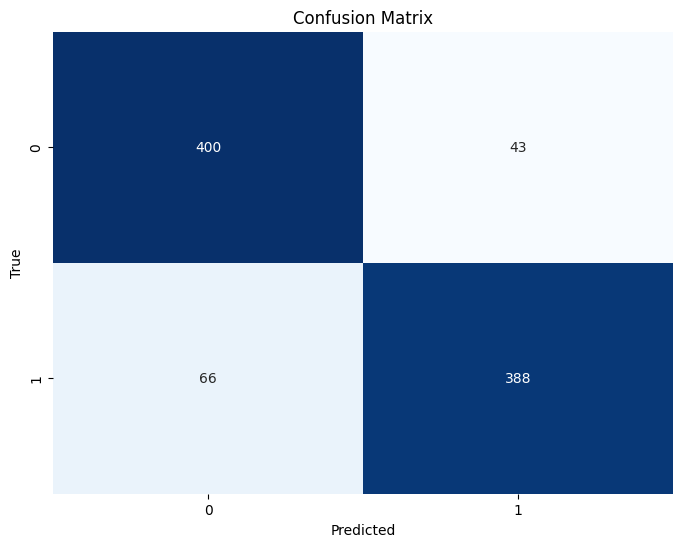

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = logistic_regression_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [57]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8784838350055741

In [58]:
#tfidf
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.2, random_state=42)

In [59]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

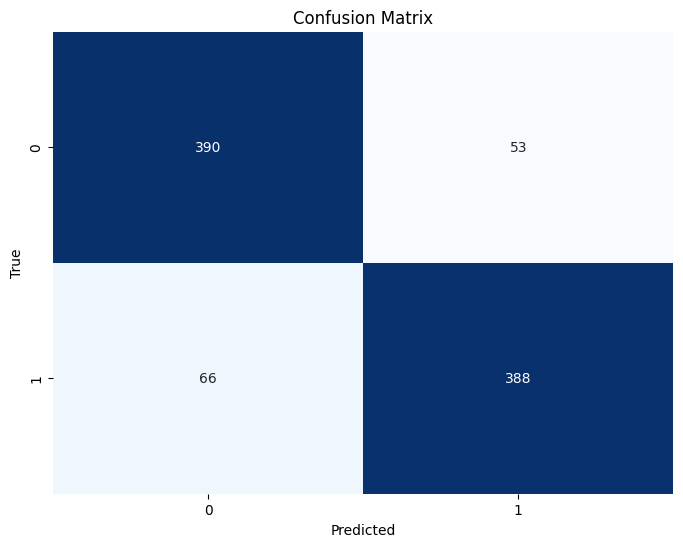

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = logistic_regression_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.867335562987737

## Since Lemmatiztion gives better accuracy than stemming we will be using Lemmatized_Tweets going further

In [72]:
## Grid Search CV for Hyper parameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Default vectorizer
    ('classifier', LogisticRegression())
])

parameters = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()], # Grid for both vectorizers
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'vectorizer__max_df': [0.5, 0.75, 1.0],      # ignore terms that appear in more than max_df proportion of documents
    'classifier__C': [0.1, 1.0, 10.0],           # regularization parameter
}

scoring = {
    'f1_score': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score)
}

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, parameters, scoring=scoring, cv=5, refit='f1_score')
grid_search.fit(lemmatized_tweets, y)

# Print the best parameters, best F1-score, and best accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best F1-score found:", grid_search.best_score_)
print("Best accuracy found:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])

Best parameters found: {'classifier__C': 10.0, 'vectorizer': TfidfVectorizer(), 'vectorizer__max_df': 0.5, 'vectorizer__ngram_range': (1, 2)}
Best F1-score found: 0.8763288411317971
Best accuracy found: 0.875557911291607


#### Using Naive Baye's Classifier with Grid Search CV

In [73]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
parameters = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],  
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  
    'vectorizer__max_df': [0.5, 0.75, 1.0],      
}





grid_search = GridSearchCV(pipeline, parameters, scoring=scoring, cv=5, refit='f1_score')
grid_search.fit(lemmatized_tweets, y)


print("Best parameters found:", grid_search.best_params_)
print("Best F1-score found:", grid_search.best_score_)
print("Best accuracy found:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])


Best parameters found: {'vectorizer': TfidfVectorizer(), 'vectorizer__max_df': 0.5, 'vectorizer__ngram_range': (1, 2)}
Best F1-score found: 0.8780238840924017
Best accuracy found: 0.8739954112916071


#### Using K Neares Neighbour CLassifier with Grid Search CV

In [74]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  
    ('classifier', KNeighborsClassifier())
])


parameters = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],  
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  
    'vectorizer__max_df': [0.5, 0.75, 1.0],      
    'classifier__n_neighbors': [3, 5, 7]  # no of neighbors       
}




grid_search = GridSearchCV(pipeline, parameters, scoring=scoring, cv=5, refit='f1_score')
grid_search.fit(lemmatized_tweets, y)


print("Best parameters found:", grid_search.best_params_)
print("Best F1-score found:", grid_search.best_score_)
print("Best accuracy found:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])

Best parameters found: {'classifier__n_neighbors': 7, 'vectorizer': TfidfVectorizer(), 'vectorizer__max_df': 0.5, 'vectorizer__ngram_range': (1, 1)}
Best F1-score found: 0.7949803692200594
Best accuracy found: 0.7874666547220895


#### Using SVM Classifier

In [65]:
# from sklearn.svm import SVC

# pipeline = Pipeline([
#     ('vectorizer', CountVectorizer()),  
#     ('classifier', SVC())
# ])


# parameters = {
#     'vectorizer': [CountVectorizer(), TfidfVectorizer()],  
#     'vectorizer__ngram_range': [(1, 1), (1, 2)],  
#     'vectorizer__max_df': [0.5, 0.75, 1.0],      
#     'classifier__C': [0.1, 1.0, 10.0],           # regularization parameter for SVM
#     'classifier__kernel': ['linear', 'rbf']      # kernel for SVM
# }


# scoring = {
#     'f1_score': make_scorer(f1_score),
#     'accuracy': make_scorer(accuracy_score)
# }


# grid_search = GridSearchCV(pipeline, parameters, scoring=scoring, cv=5, refit='f1_score')
# grid_search.fit(lemmatize_tweets, y)


# print("Best parameters found:", grid_search.best_params_)
# print("Best F1-score found:", grid_search.best_score_)
# print("Best accuracy found:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])

#### Using Decision Tree CLassifier

In [75]:

from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

parameters = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()], 
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  
    'vectorizer__max_df': [0.5, 0.75, 1.0],      
    'classifier__max_depth': [None, 10, 20],     # maximum depth of the tree
}


grid_search = GridSearchCV(pipeline, parameters, scoring=scoring, cv=5, refit='f1_score')
grid_search.fit(lemmatized_tweets, y)

print("Best parameters found:", grid_search.best_params_)
print("Best F1-score found:", grid_search.best_score_)
print("Best accuracy found:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])

Best parameters found: {'classifier__max_depth': None, 'vectorizer': CountVectorizer(), 'vectorizer__max_df': 1.0, 'vectorizer__ngram_range': (1, 2)}
Best F1-score found: 0.7789439333245056
Best accuracy found: 0.7729716614906832


#### Using Random Forest Classifier (Ensemble Bagging)

In [76]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', RandomForestClassifier())
])

parameters = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  
    'vectorizer__max_df': [0.5, 0.75, 1.0],      
    # 'classifier__n_estimators': [100, 200, 300], # number of trees in the forest
    'classifier__max_depth': [None, 10, 20]      # maximum depth of the trees
}

grid_search = GridSearchCV(pipeline, parameters, scoring=scoring, cv=5, refit='f1_score')
grid_search.fit(lemmatized_tweets, y)

print("Best parameters found:", grid_search.best_params_)
print("Best F1-score found:", grid_search.best_score_)
print("Best accuracy found:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])

Best parameters found: {'classifier__max_depth': None, 'vectorizer': TfidfVectorizer(), 'vectorizer__max_df': 0.5, 'vectorizer__ngram_range': (1, 1)}
Best F1-score found: 0.8396830090375141
Best accuracy found: 0.8338549132027394


#### Using XGBOOST (Ensemble Boosting)

In [77]:
from xgboost import XGBClassifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  
    ('classifier', XGBClassifier())
])
parameters = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],  
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  
    'vectorizer__max_df': [0.5, 0.75, 1.0],      
    # 'classifier__n_estimators': [100, 200, 300], # number of boosting rounds
    'classifier__max_depth': [3, 6, 9],          # maximum depth of the trees
}
grid_search = GridSearchCV(pipeline, parameters, scoring=scoring, cv=5, refit='f1_score')
grid_search.fit(lemmatized_tweets, y)

print("Best parameters found:", grid_search.best_params_)
print("Best F1-score found:", grid_search.best_score_)
print("Best accuracy found:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])

Best parameters found: {'classifier__max_depth': 9, 'vectorizer': CountVectorizer(), 'vectorizer__max_df': 0.5, 'vectorizer__ngram_range': (1, 1)}
Best F1-score found: 0.8258187650452943
Best accuracy found: 0.8289456919891702


## Now lets try to use SMOTE to  handle the class imbalance.

In [78]:
## Applyin smote on BOW and TFIDF and running test on the best model NBClassifier

X_whol = df['tweet']
y_whol = df['label']
print(X_whol.shape, y_whol.shape)
tweets_whol = X_whol.copy()
corpus_whol = []
for i in range(len(tweets_whol)):
    review = re.sub('[^a-zA-Z]', ' ', tweets_whol[i])
    review = review.lower()
    review = review.split()
    
    review = ' '.join(review)
    corpus_whol.append(review)

tokenized_tweets_whol = [word_tokenize(tweet.lower()) for tweet in corpus_whol]

filtered_tweets_whol = []
for tweet_tokens in tokenized_tweets_whol:
    filtered_tokens = [word for word in tweet_tokens if word not in stop_words]
    filtered_tweets_whol.append(filtered_tokens)

lemmatized_tweets_whol = [' '.join([lemmatizer.lemmatize(word) for word in tweet]) for tweet in filtered_tweets_whol]


from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipeline = ImbPipeline([
    ('vectorizer', CountVectorizer()),  
    ('smote', SMOTE()),  # SMOTE
    ('classifier', MultinomialNB())
])

parameters = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__max_df': [0.5, 0.75, 1.0],
    
}


grid_search = GridSearchCV(pipeline, parameters, scoring=scoring, cv=5, refit='f1_score')
grid_search.fit(lemmatized_tweets_whol, y_whol)

print("Best parameters found:", grid_search.best_params_)
print("Best F1-score found:", grid_search.best_score_)
print("Best accuracy found:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])

(31962,) (31962,)
Best parameters found: {'vectorizer': CountVectorizer(), 'vectorizer__max_df': 1.0, 'vectorizer__ngram_range': (1, 2)}
Best F1-score found: 0.6384528651624861
Best accuracy found: 0.9478444675193278


#### As we can see that the accuracy is high but the F1-Score is pretty low while using SMOTE which is the harmonic mean of precision and recall Means that the problem is beyond the class imbalance and maybe the f1 score is low due to poor quality of the data or imperfect-oversampling


In [93]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:

df

